# Cleaning and Preprocessing Data

The below script is dedicated to cleaning and preprocessing data extracted from the POP909 dataset, ensuring it is suitable for further analysis and modeling tasks. It begins by installing necessary libraries, including datasets, and importing required modules such as glob, load_dataset, and pandas.

The script then proceeds to load and preprocess the dataset. It identifies and handles missing values by checking for empty rows in the 'text' column, removing them if found. Next, it addresses duplicate rows, first by detecting them based on the 'text' column and then removing them to ensure data integrity. Furthermore, it verifies that each row contains 'NOTE_ON', ensuring that each entry represents a musical event. Any rows lacking this information are filtered out.

After data cleaning, the script performs additional preprocessing steps, such as removing specific substrings like '=4_4' and calculating statistics on the number of words in each row. It visualizes the distribution of word counts with a histogram and filters out texts with fewer than 100 words.

Subsequently, the cleaned dataset is converted into a Hugging Face dataset object for further processing. It removes unnecessary columns and pushes the cleaned dataset to the Hugging Face Hub, making it accessible for other users or downstream tasks.

Throughout the script, detailed comments accompany each step, providing clarity and insight into the data cleaning and preprocessing procedures. Overall, this notebook serves as a comprehensive guide for preparing MIDI data from the POP909 dataset for subsequent analysis and modeling.

In [37]:
!pip install datasets

In [71]:
# Import necessary libraries

import glob  # Module for reading files and directories
from datasets import load_dataset  # Hugging Face's library for loading datasets
import pandas as pd  # Popular data manipulation library
from huggingface_hub import notebook_login  # Hugging Face's library for interacting with the Hub
from datasets import Dataset # Hugging Face's library for working with various datasets

### Loading and Preprocessing the Dataset

In this section, we load a dataset named "text" from the below file path using the Hugging Face `load_dataset` function. We then access the training split ("train") and convert it to a Pandas DataFrame for further analysis.

In [39]:
# Find all files with the extension ".txt" in the specified directory and subdirectories
dataset_files = glob.glob(r"C:\Users\naomi\Thesis\Thesis\Thesis-main\tokenized_output_v2\all_tokenized_outputs.txt")

In [40]:
# Load a dataset type "text" using the specified file paths
dataset = load_dataset("text", data_files=dataset_files)

Found cached dataset text (C:/Users/naomi/.cache/huggingface/datasets/text/default-57dab39ad4c2d6ee/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2)


  0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
# Check the available splits in the dataset
available_splits = dataset.keys()

# Print the list of available splits
print("Available splits:", available_splits)

Available splits: dict_keys(['train'])


In [42]:
# Access the training split ("train") from the loaded dataset
ds = dataset["train"]

In [43]:
# Convert the training split (ds) to a Pandas DataFrame
df = ds.to_pandas()

The code first loads the dataset and extracts the training split. It then converts this split into a Pandas DataFrame (df) to facilitate exploratory data analysis.

In [44]:
# Display the first few rows of the Pandas DataFrame (df)
df.head()

,text
0,PIECE_START TRACK_START INST=0 BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END TRACK_END TRACK_START INST=0 BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END TRACK_END TRACK_START INST=0 BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END TRACK_END
1,PIECE_START TRACK_START INST=0 BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=46 TIME_DELTA=5 NOTE_ON=53 TIME_DELTA=5 NOTE_ON=73 NOTE_ON=58 NOTE_OFF=75 TIME_DELTA=4 NOTE_ON=61 TIME_DELTA=12 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=70 TIME_DELTA=1 NOTE_OFF=53 TIME_DELTA=1 NOTE_OFF=46 TIME_DELTA=4 NOTE_OFF=61 TIME_DELTA=2 NOTE_OFF=58 TIME_DELTA=24 NOTE_OFF=70 BAR_END TRACK_END TRACK_START INST=0 BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TI

## Handling Missing Values

### Checking for Empty Rows in the 'text' Column

In the following code snippet, we are validating the quality of our dataset by checking for empty or missing values in the 'text' column. This is a crucial step in data preprocessing to ensure the dataset is clean and suitable for modeling.

In [45]:
# Create a mask for empty rows
mask = df['text'].isna() | (df['text'] == '')

# Apply the mask and get the index of empty rows
empty_rows_index = df[mask].index

# Check if there are any empty rows
if empty_rows_index.empty:
    print('No empty rows')
else:
    print('Empty rows at the following indices:', empty_rows_index)

Empty rows at the following indices: Index([    13,     26,     40,     54,     68,     82,     96,    110,    125,
          140,
       ...
       205025, 205055, 205086, 205117, 205123, 205153, 205184, 205214, 205244,
       205274],
      dtype='int64', length=9234)


The code first creates a boolean mask identifying rows where the 'text' column is either NaN or an empty string. It then collects the indices of these rows and checks if there are any. If empty rows are found, the code prints the indices; otherwise, it prints 'No empty rows.'

In [46]:
# Calculate the number of rows in the Pandas DataFrame (df)
num_rows = len(df)
num_rows

205282

The len(df) expression returns the total number of rows in the DataFrame. This information is useful for understanding the size and scope of the dataset. Here we can see we have 205,282 rows of data.

In [47]:
# Filter the Pandas DataFrame (df) to exclude rows where the 'text' column is an empty string
df = df[df['text'] != '']

This operation removes rows with empty 'text' values, ensuring that the DataFrame contains only rows where the 'text' column has meaningful content

In [48]:
# Calculate the number of rows in the Pandas DataFrame (df)
num_rows = len(df)
num_rows

196048

In [49]:
((196048 - 205282) / 205282) * 100

-4.498202472696096

This means that only 4.5% of the rows were removed because they were empty.

## Identify and handling of duplicate rows

In [50]:
# Create a mask for duplicate rows
duplicate_mask = df.duplicated(subset=['text'], keep='first')

# Apply the mask and get the index of duplicate rows
duplicate_rows_index = df[duplicate_mask].index

# Check if there are any duplicate rows
if duplicate_rows_index.empty:
    print('No duplicate rows')
else:
    print('Duplicate rows at the following indices:', duplicate_rows_index)

Duplicate rows at the following indices: Index([    29,     30,     37,     38,     39,     51,     52,     53,     56,
           57,
       ...
       205268, 205269, 205270, 205271, 205272, 205273, 205276, 205277, 205278,
       205279],
      dtype='int64', length=35970)


Create a boolean mask for duplicate rows based on the 'text' column. Extract the indices of these duplicates and check for their presence. If duplicates are found, print their indices; otherwise, print 'No duplicate rows.'

The Int64Index represents the indices of the DataFrame where duplicate rows are found. The indices are listed in the form of a Pandas Index object, which is a sequence of integers. In this case, there are 35,970 duplicate rows identified, and their indices are provided in the output. For example, the first few duplicate indices are from 29 to 57, and it continues until index 205279. Each of these indices corresponds to a row in your DataFrame that has the same value in the 'text' column as another row, indicating a duplicate entry.


In [51]:
# Remove duplicate rows based on the values in the 'text' column
# The drop_duplicates() method is used to eliminate duplicate rows from the DataFrame
# 'subset=['text']' specifies that duplicates are identified based on the 'text' column
# 'keep='first'' ensures that the first occurrence of a duplicate is retained, and subsequent duplicates are dropped
df = df.drop_duplicates(subset=['text'], keep='first')

Now to check and see if all the duplicates were removed.

In [52]:
# Create a mask for duplicate rows
duplicate_mask = df.duplicated(subset=['text'], keep='first')

# Apply the mask and get the index of duplicate rows
duplicate_rows_index = df[duplicate_mask].index

# Check if there are any duplicate rows
if duplicate_rows_index.empty:
    print('No duplicate rows')
else:
    print('Duplicate rows at the following indices:', duplicate_rows_index)

No duplicate rows


In [53]:
# Calculate the number of rows in the Pandas DataFrame (df)
num_rows = len(df)
num_rows

160078

## Music in each row

Check to see if all rows contain 'NOTE_ON' to ensure there is atleast one note being played in each row. 

In [54]:
# Create a boolean mask to identify rows where the 'text' column does not contain the substring 'NOTE_ON'
mask = ~df['text'].str.contains('NOTE_ON')

# Apply the mask and get the index of rows that do not contain 'NOTE_ON'
no_note_on_index = df[mask].index

# Check if there are any rows that do not contain 'NOTE_ON'
if no_note_on_index.empty:
    print('All rows contain "NOTE_ON"')
else:
    print('Rows that do not contain "NOTE_ON" at the following indices:', no_note_on_index)

Rows that do not contain "NOTE_ON" at the following indices: Index([   266,   1440,   1635,   3047,   3048,   3049,   6276,   7279,   8306,
        17145,  17146,  18898,  18899,  37960,  60380,  60381,  65362,  65672,
        67947,  67948,  67949,  74613,  75929,  76001,  76239,  92151,  92152,
       124792, 124793, 124794, 124925, 124926, 162775, 171003, 171004, 171005],
      dtype='int64')


Here is the list of the row numbers that do NOT contain 'NOTE_ON' 

Let's have a look at one of these rows and see what is inside.

In [55]:
# Access and print the content of a specific row
row = df.loc[266]
print(row)

text    PIECE_START TRACK_START INST=0 BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 BAR_END TRACK_END TRACK_START INST=0 BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 BAR_END TRACK_END
Name: 266, dtype: object


In [56]:
# Create a boolean mask to identify rows where the 'text' column contains the substring 'NOTE_ON'
mask = df['text'].str.contains('NOTE_ON')

# Apply the mask and keep only the rows that contain 'NOTE_ON'
df = df[mask]

This code filters the DataFrame to retain only the rows where the 'text' column contains the substring 'NOTE_ON'. The resulting DataFrame (df) includes only those rows that satisfy this condition.

In [57]:
pd.set_option('display.max_columns', None)  # This ensures that all columns are displayed
pd.set_option('display.width', None)        # This ensures that each line of output will be as wide as necessary
pd.set_option('display.max_colwidth', None) # This ensures that columns will not be truncated

In [58]:
# Display the first few rows of the Pandas DataFrame (df)
df.head()

,text
0,PIECE_START TRACK_START INST=0 BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END TRACK_END TRACK_START INST=0 BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END TRACK_END TRACK_START INST=0 BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END TRACK_END
1,PIECE_START TRACK_START INST=0 BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=46 TIME_DELTA=5 NOTE_ON=53 TIME_DELTA=5 NOTE_ON=73 NOTE_ON=58 NOTE_OFF=75 TIME_DELTA=4 NOTE_ON=61 TIME_DELTA=12 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=70 TIME_DELTA=1 NOTE_OFF=53 TIME_DELTA=1 NOTE_OFF=46 TIME_DELTA=4 NOTE_OFF=61 TIME_DELTA=2 NOTE_OFF=58 TIME_DELTA=24 NOTE_OFF=70 BAR_END TRACK_END TRACK_START INST=0 BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TI

In [59]:
# Calculate the number of rows in the Pandas DataFrame (df)
num_rows = len(df)
num_rows

160042

In [60]:
# Replace occurrences of the whole word '=4_4' with an empty string in the 'text' column
# The use of regex with word boundaries ensures that only whole-word matches are replaced
df.loc[:, 'text'] = df['text'].str.replace(r'\b=4_4\b', '', case=False, regex=True)

In [61]:
# Replace occurrences of '=4_4' (without considering word boundaries) with an empty string in the 'text' column
# The use of regex allows for more flexibility in matching the specified pattern
df['text'] = df['text'].str.replace(r'\b=4_4\b', '', case=False, regex=True)

In [62]:
# Replace all occurrences of the literal string '=4_4' with an empty string in the 'text' column
# This is a literal string replacement without using regular expressions
df['text'] = df['text'].str.replace('=4_4', '', regex=False)

In [63]:
# Display the first few rows of the Pandas DataFrame (df)
df.head()

,text
0,PIECE_START TRACK_START INST=0 BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END TRACK_END TRACK_START INST=0 BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END TRACK_END TRACK_START INST=0 BAR_START TIME_DELTA=24 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END TRACK_END
1,PIECE_START TRACK_START INST=0 BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=80 NOTE_ON=49 TIME_DELTA=5 NOTE_ON=56 TIME_DELTA=5 NOTE_ON=61 TIME_DELTA=5 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=56 TIME_DELTA=2 NOTE_OFF=80 NOTE_OFF=49 TIME_DELTA=3 NOTE_OFF=61 NOTE_OFF=65 TIME_DELTA=1 NOTE_ON=66 TIME_DELTA=6 NOTE_OFF=66 TIME_DELTA=1 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=46 TIME_DELTA=5 NOTE_ON=53 TIME_DELTA=5 NOTE_ON=73 NOTE_ON=58 NOTE_OFF=75 TIME_DELTA=4 NOTE_ON=61 TIME_DELTA=12 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=70 TIME_DELTA=1 NOTE_OFF=53 TIME_DELTA=1 NOTE_OFF=46 TIME_DELTA=4 NOTE_OFF=61 TIME_DELTA=2 NOTE_OFF=58 TIME_DELTA=24 NOTE_OFF=70 BAR_END TRACK_END TRACK_START INST=0 BAR_START TIME_DELTA=24 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START TIME_DELTA=24 NOTE_ON=75 NOTE_ON=47 TIME_DELTA=5 NOTE_ON=54 TIME_DELTA=5 NOTE_OFF=75 NOTE_ON=73 NOTE_ON=59 TIME_DELTA=5 NOTE_ON=66 NOTE_OFF=73 TIME_DELTA=4 NOTE_ON=71 TIME_DELTA=6 NOTE_OFF=59 NOTE_OFF=71 TIME_DELTA=1 NOTE_OFF=47 TIME_DELTA=1 NOTE_OFF=54 TIME_DELTA=1 NOTE_ON=80 TIME_DELTA=4 NOTE_OFF=80 TIME_DELTA=1 NOTE_ON=82 TIME_DELTA=4 NOTE_OFF=66 NOTE_OFF=82 BAR_END BAR_START TI

In [64]:
# Create a new column 'num_words' that contains the number of words in each row of the 'text' column
df['num_words'] = df['text'].str.split().str.len()

# Calculate the highest, lowest, and average number of words
highest_num_words = df['num_words'].max()
lowest_num_words = df['num_words'].min()
average_num_words = df['num_words'].mean()

# Print the results
print('Highest number of words:', highest_num_words)
print('Lowest number of words:', lowest_num_words)
print('Average number of words:', average_num_words)

Highest number of words: 1888
Lowest number of words: 17
Average number of words: 255.7036153009835


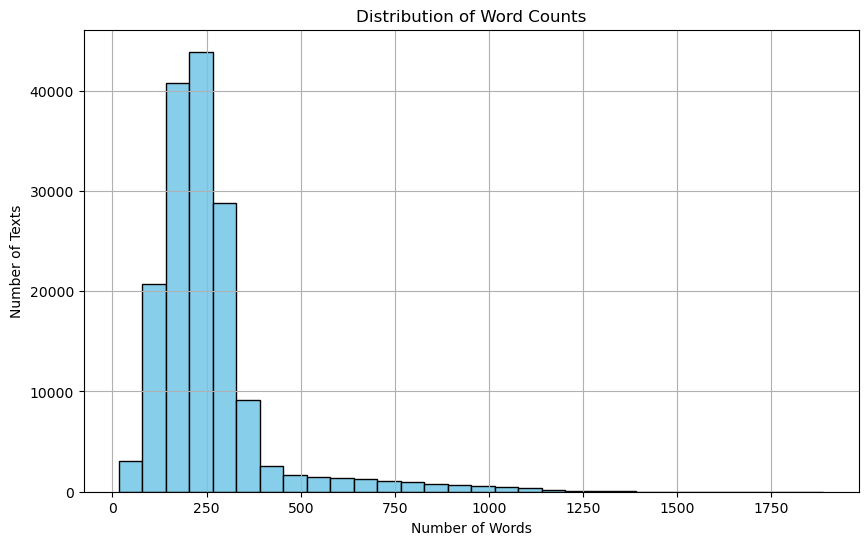

In [65]:
import matplotlib.pyplot as plt

# Create a histogram of word counts
plt.figure(figsize=(10, 6))
plt.hist(df['num_words'], bins=30, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Texts')
plt.grid(True)
plt.show()

The right skewed histogram shows that most of the text length is between 17 and 400ish. To filter out the shorter texts, remove texts with a number of words less than 100.

In [66]:
# Remove texts with a number of words less than 100
df = df[df['num_words'] >= 100]

In [67]:
# Calculate the highest, lowest, and average number of words
highest_num_words = df['num_words'].max()
lowest_num_words = df['num_words'].min()
average_num_words = df['num_words'].mean()

# Print the results
print('Highest number of words:', highest_num_words)
print('Lowest number of words:', lowest_num_words)
print('Average number of words:', average_num_words)

Highest number of words: 1888
Lowest number of words: 100
Average number of words: 263.8001215424124


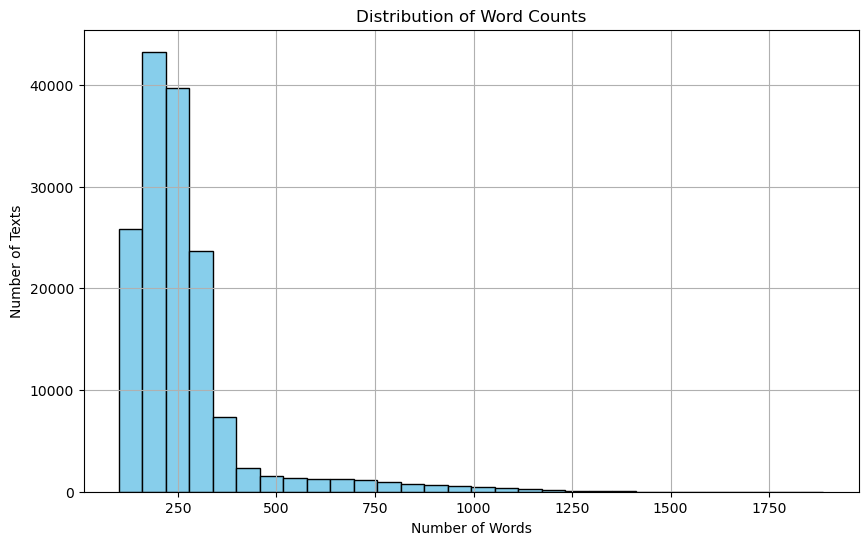

In [68]:
import matplotlib.pyplot as plt

# Create a histogram of word counts
plt.figure(figsize=(10, 6))
plt.hist(df['num_words'], bins=30, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Texts')
plt.grid(True)
plt.show()

In [69]:
# Remove the 'num_words' column
df = df.drop(columns=['num_words'])

In [73]:
# Convert the DataFrame to a Hugging Face dataset
clean_dataset = Dataset.from_pandas(df)
clean_dataset

Dataset({
    features: ['text', '__index_level_0__'],
    num_rows: 153033
})

In [33]:
# Remove the column "__index_level_0__" from the 'clean_dataset'
clean_dataset = clean_dataset.remove_columns("__index_level_0__")
clean_dataset

In [42]:
# Log in to the Hugging Face Hub from within a Jupyter notebook
notebook_login()

In [43]:
clean_dataset.push_to_hub("aimusicgen/pop909_clean_data")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/34 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/280 [00:00<?, ?B/s]